The dataset contains of 7560 record with 6 attributes depicting the Q4 sales transactions of AAL(an Australian clothing brand) across Australian States.

In [53]:
import pandas as pd
import numpy as np
df = pd.read_csv("C:\\Users\\Atharv Bansal\\Desktop\\IITG Projects\\DS_course_end_project\\AusApparalSales4thQrt2020.csv")

In [54]:
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [55]:
df.tail()

,Date,Time,State,Group,Unit,Sales
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000
7556,30-Dec-2020,Evening,TAS,Kids,15,37500
7557,30-Dec-2020,Evening,TAS,Men,15,37500
7558,30-Dec-2020,Evening,TAS,Women,11,27500
7559,30-Dec-2020,Evening,TAS,Seniors,13,32500


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [57]:
df.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [58]:
df.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [59]:
df.notna().sum()


Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64

In [60]:
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000
7556,2020-12-30,Evening,TAS,Kids,15,37500
7557,2020-12-30,Evening,TAS,Men,15,37500
7558,2020-12-30,Evening,TAS,Women,11,27500



The dataset was inspected using `head()`, `tail()`, and `info()` to understand its structure,
data types, and completeness.

The dataset was examined using `isna()` and `notna()` functions.
No missing values were found in any column.

Additionally, numerical columns such as Units and Sales were inspected using 
descriptive statistics to check for invalid or negative values. 
No incorrect or inconsistent data entries were observed.

In [61]:
df['revenue'] = df['Unit']*df['Sales']

In [62]:
df

,Date,Time,State,Group,Unit,Sales,revenue
0,2020-10-01,Morning,WA,Kids,8,20000,160000
1,2020-10-01,Morning,WA,Men,8,20000,160000
2,2020-10-01,Morning,WA,Women,4,10000,40000
3,2020-10-01,Morning,WA,Seniors,15,37500,562500
4,2020-10-01,Afternoon,WA,Kids,3,7500,22500
...,...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000,490000
7556,2020-12-30,Evening,TAS,Kids,15,37500,562500
7557,2020-12-30,Evening,TAS,Men,15,37500,562500
7558,2020-12-30,Evening,TAS,Women,11,27500,302500


Feature called `revenue` was created by multiplying Units sold with Sales value.

In [63]:
from scipy.stats import skew
print(skew(df['revenue']))

2.384129432941997


In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[['Unit_Normalized', 'Revenue_Normalized']] = scaler.fit_transform(df[['Unit', 'revenue']])
df.head()

,Date,Time,State,Group,Unit,Sales,revenue,Unit_Normalized,Revenue_Normalized
0,2020-10-01,Morning,WA,Kids,8,20000,160000,0.095238,0.014215
1,2020-10-01,Morning,WA,Men,8,20000,160000,0.095238,0.014215
2,2020-10-01,Morning,WA,Women,4,10000,40000,0.031746,0.002843
3,2020-10-01,Morning,WA,Seniors,15,37500,562500,0.206349,0.052357
4,2020-10-01,Afternoon,WA,Kids,3,7500,22500,0.015873,0.001185


Min-Max Normalization was applied to the Units and Revenue columns to scale values
between 0 and 1.

In [65]:
df[['Sales', 'Unit']].describe()

,Sales,Unit
count,7560.000000,7560.000000
mean,45013.558201,18.005423
std,32253.506944,12.901403
min,5000.000000,2.000000
25%,20000.000000,8.000000
50%,35000.000000,14.000000
75%,65000.000000,26.000000
max,162500.000000,65.000000


In [66]:
df[['Sales', 'Unit']].mean()

Sales    45013.558201
Unit        18.005423
dtype: float64

In [67]:
df[['Sales', 'Unit']].median()

Sales    35000.0
Unit        14.0
dtype: float64

In [68]:
df[['Sales', 'Unit']].mode()

,Sales,Unit
0,22500,9


In [69]:
group_revenue = (df.groupby('Group')['revenue'].sum().sort_values(ascending = False))
group_revenue

Group
Women      2357057500
Men        2338530000
Kids       2299242500
Seniors    2277877500
Name: revenue, dtype: int64

In [70]:
highest_group = group_revenue.idxmax()
lowest_group = group_revenue.idxmin()

highest_group, lowest_group


(' Women', ' Seniors')

In [71]:
state_revenue = (df.groupby('State')['revenue'].sum().sort_values(ascending = False))
state_revenue

State
VIC    4433275000
NSW    2265295000
SA     1414627500
QLD     490462500
TAS     227010000
NT      223500000
WA      218537500
Name: revenue, dtype: int64

In [72]:
highest_state = state_revenue.idxmax()
lowest_state = state_revenue.idxmin()

highest_state, lowest_state


(' VIC', ' WA')

In [73]:
df.set_index('Date', inplace = True)

In [74]:
weekly_revenue = df.resample('W')['revenue'].sum()
weekly_revenue.head()

Date
2020-10-04    384450000
2020-10-11    706352500
2020-10-18    693100000
2020-10-25    698375000
2020-11-01    557157500
Freq: W-SUN, Name: revenue, dtype: int64

In [75]:
monthly_revenue = df.resample('M')['revenue'].sum()
monthly_revenue.head()

C:\Users\Atharv Bansal\AppData\Local\Temp\ipykernel_17616\2284823482.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = df.resample('M')['revenue'].sum()


Date
2020-10-31    2971840000
2020-11-30    2059887500
2020-12-31    4240980000
Freq: ME, Name: revenue, dtype: int64

In [76]:
quarterly_revenue = df.resample('Q')['revenue'].sum()
quarterly_revenue.head()

C:\Users\Atharv Bansal\AppData\Local\Temp\ipykernel_17616\290447780.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_revenue = df.resample('Q')['revenue'].sum()


Date
2020-12-31    9272707500
Freq: QE-DEC, Name: revenue, dtype: int64

DATA VISUALISATION  

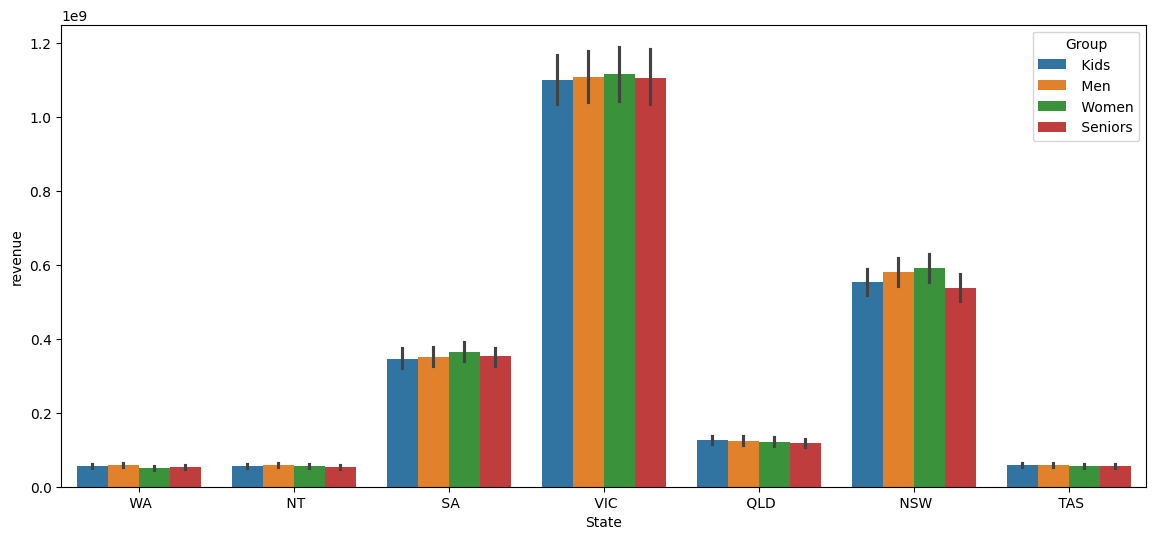

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (14, 6))
sns.barplot(data = df, x = 'State', y = 'revenue', hue = 'Group', estimator = sum)
plt.title = 'State-wise Revenue by Customer Group'
plt.ylabel = 'Total Revenue'
plt.xlabel = 'State'
plt.show()

TypeError: 'str' object is not callable

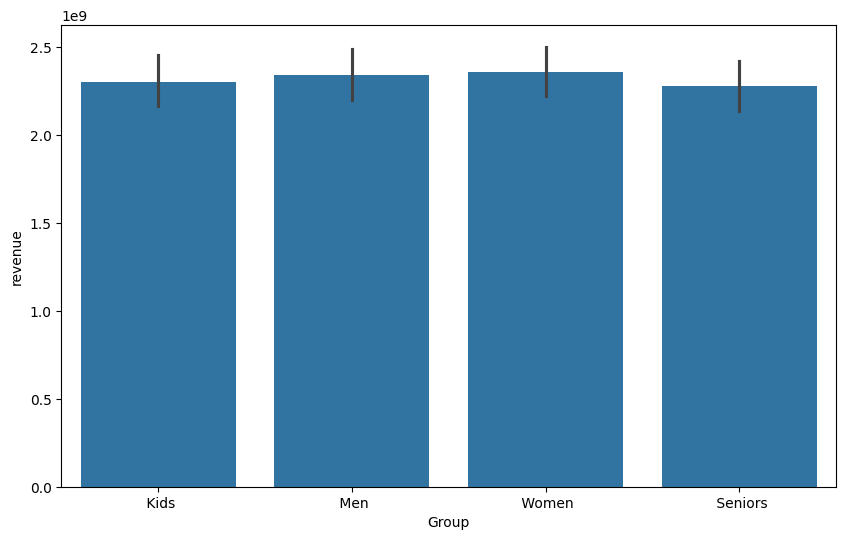

In [78]:
plt.figure(figsize = (10, 6))
sns.barplot(data = df, x = 'Group', y = 'revenue', estimator = sum)
plt.title('Revenue Contribution by Customer Group')
plt.ylabel('Total Revenue')
plt.xlabel('Customer Group')
plt.show()

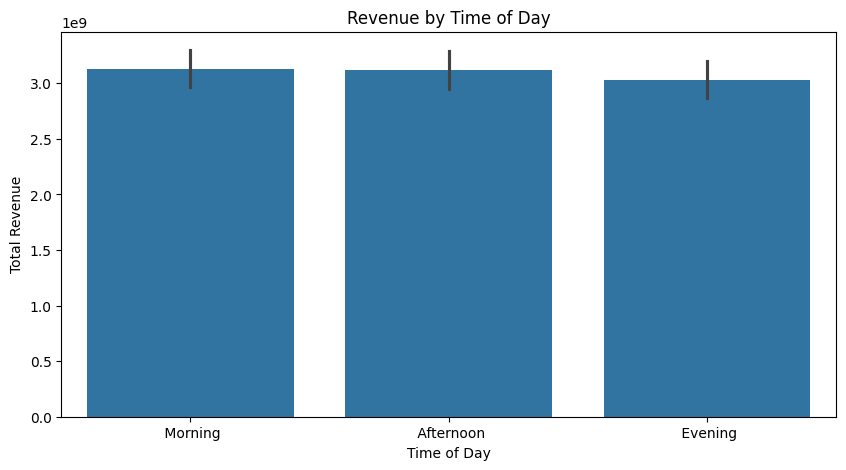

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(
    data=df,
    x='Time',
    y='revenue',
    estimator=sum
)
plt.title('Revenue by Time of Day')
plt.ylabel('Total Revenue')
plt.xlabel('Time of Day')
plt.show()

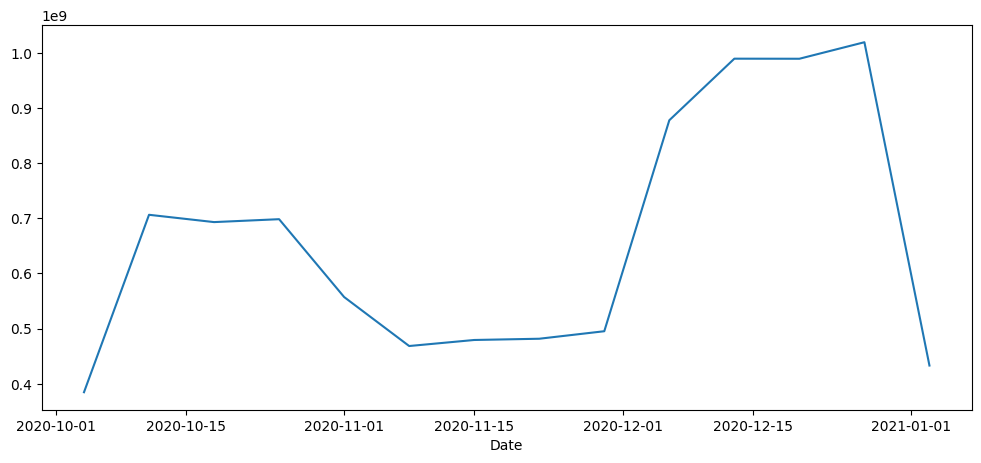

In [ ]:
plt.figure(figsize = (12,5))
sns.lineplot(x = weekly_revenue.index, y = weekly_revenue.values)
plt.xlabel = 'Week'
plt.ylabel = 'Revenue'
plt.title = 'weekly revenue trend'
plt.show()

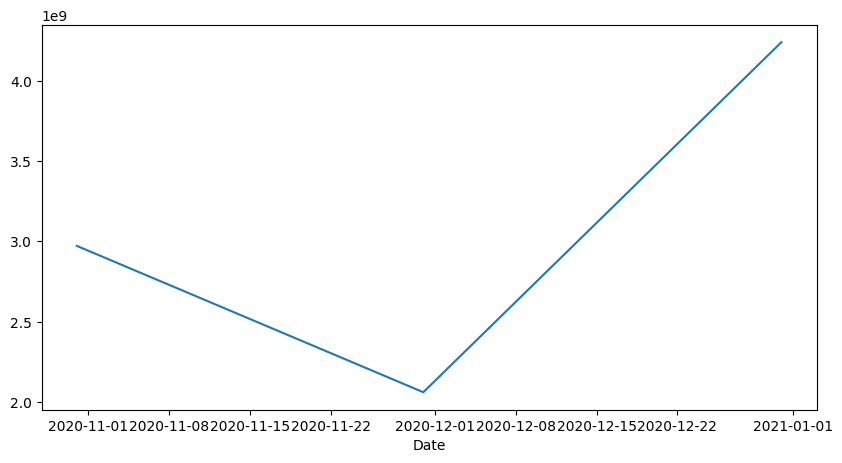

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values)
plt.ylabel = 'Revenue'
plt.xlabel = 'Month'
plt.title = 'Monthly Revenue Trend'
plt.show()


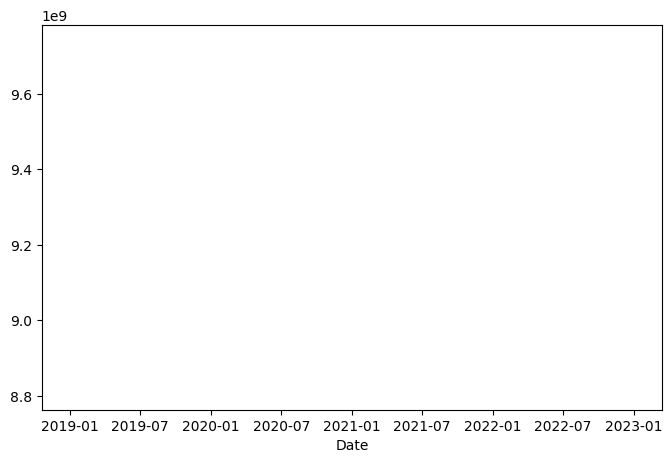

In [ ]:
plt.figure(figsize=(8,5))
sns.lineplot(x=quarterly_revenue.index, y=quarterly_revenue.values)
plt.title = 'Quarterly Revenue Trend'
plt.ylabel = 'Revenue'
plt.xlabel = 'Quarter'
plt.show()


### Key Findings

1. Sales and revenue are unevenly distributed across states, indicating strong regional demand variations.
2. Certain customer groups contribute significantly more to total revenue, while others underperform.
3. Time-of-day analysis shows distinct purchasing patterns, suggesting opportunities for targeted promotions.
4. Revenue distribution is positively skewed, meaning a smaller subset of transactions accounts for a
   disproportionately large share of total revenue.
5. Weekly and monthly trends indicate fluctuations in sales performance within the quarter,
   emphasizing the importance of short-term monitoring.


Low-revenue states may require strategic interventions such as localized promotions, revised pricing,
or improved supply chain support to enhance performance.

Lower-performing segments may benefit from targeted marketing campaigns
and product repositioning.

### Strategic Recommendations

1. Allocate higher marketing and inventory budgets to high-performing states to maximize returns.
2. Design targeted sales programs and promotional campaigns for underperforming states.
3. Strengthen engagement with top-performing customer groups through loyalty programs and personalized offers.
4. Introduce time-of-day-based promotions during low-activity periods to improve overall sales volume.
5. Introduce target based incentive for employees to boost sales in low performing states.
